In [1]:
# Importing Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import pandas as pd    
import numpy as np    

import seaborn as sns    
from scipy import stats    
from scipy.stats import kurtosis, skew   

import matplotlib
import matplotlib.pyplot as plt   

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (8, 6)


In [2]:
# Reading the Dataset
df_cleaned1 = pd.read_csv('cleaned_data.csv')

In [3]:
# Exploring the Dataset
# You can use some basic commands to understand the structure of your dataset:

# Viewing the first few rows
print(df_cleaned1.head())

# Checking the dimensions of the dataset
print(df_cleaned1.shape)

# Column names and data types
print(df_cleaned1.info())

# Checking for missing values
print(df_cleaned1.isnull().sum())


       make_model_ordinal         short_description           make     model  \
0     Mercedes-Benz A 160                       CDi  Mercedes-Benz     A 160   
1   Mercedes-Benz EQE 350                      350+  Mercedes-Benz   EQE 350   
2  Mercedes-Benz A 45 AMG          S 4Matic+ 8G-DCT  Mercedes-Benz  A 45 AMG   
3  Mercedes-Benz A 35 AMG            4Matic+ 7G-DCT  Mercedes-Benz  A 35 AMG   
4  Mercedes-Benz A 45 AMG  200CDI BE Line 4M 7G-DCT  Mercedes-Benz  A 45 AMG   

                                            location    price body_type  \
0  PI EL PALMAR C/FORJA 6  11500 PUERTO DE SANTA ...  16950.0   Compact   
1         APARTADO DE CORREOS 1032  26140 LOGROÑO ES  80900.0   Compact   
2  PORT TARRACO MOLL DE LLEVANT Nº 5 LOC 6-8  430...  69900.0   Compact   
3     Carrer de Provença 31 Local  8029 BARCELONA ES  46990.0   Compact   
4               CARRIL ARAGONES 4  30007 CASILLAS ES  16800.0   Compact   

             type  doors country_version  ... co₂_efficiency  \
0   

In [4]:
df1 = df_cleaned1.copy()   

In [5]:
df_cleaned1.head().T 

,0,1,2,3,4
make_model_ordinal,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
short_description,CDi,350+,S 4Matic+ 8G-DCT,4Matic+ 7G-DCT,200CDI BE Line 4M 7G-DCT
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
model,A 160,EQE 350,A 45 AMG,A 35 AMG,A 45 AMG
location,PI EL PALMAR C/FORJA 6 11500 PUERTO DE SANTA ...,APARTADO DE CORREOS 1032 26140 LOGROÑO ES,PORT TARRACO MOLL DE LLEVANT Nº 5 LOC 6-8 430...,Carrer de Provença 31 Local 8029 BARCELONA ES,CARRIL ARAGONES 4 30007 CASILLAS ES
price,16950.0,80900.0,69900.0,46990.0,16800.0
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used,Used
doors,5.0,4.0,5.0,5.0,5.0
country_version,Spain,Spain,Spain,Spain,Spain


In [6]:
df_cleaned1.shape   

(29480, 58)

In [7]:
df_cleaned1.isnull()

,make_model_ordinal,short_description,make,model,location,price,body_type,type,doors,country_version,...,co₂_efficiency,fuel_consumption_wltp,co₂_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29475,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
29476,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
29477,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
29478,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True


In [8]:
# 6.
df_cleaned1.isnull().sum() 

make_model_ordinal                             850
short_description                             1081
make                                           850
model                                         1126
location                                      1074
price                                          850
body_type                                      850
type                                           850
doors                                         1209
country_version                              12591
offer_number                                  6387
warranty                                     16015
mileage                                        851
age                                            852
gearbox                                       1098
fuel_type                                     2637
colour                                        2574
paint                                        14985
desc                                         18670
seller                         

In [9]:
# 1. Numeric Variable Analysis
numeric_columns = df_cleaned1.select_dtypes(include=['int64', 'float64']).columns
df_cleaned1[numeric_columns].describe()


,price,doors,warranty,mileage,age,seats,power_kW,engine_size,gears,co_emissions,cylinders,fuel_consumption,empty_weight,general_inspec,last_service,production_date,fuel_consumption_wltp
count,2.863000e+04,28271.000000,13465.000000,2.862900e+04,28628.000000,25505.000000,28058.000000,27227.000000,18954.000000,18594.000000,18852.000000,0.0,17758.000000,6371.000000,2003.000000,5908.000000,100.000000
mean,2.355520e+04,4.147855,17.777274,7.262704e+04,6.837048,4.694570,119.676135,1755.001983,5.884932,134.309616,4.075854,NaN,1421.411702,1.475122,0.474289,40.016926,58.620000
std,2.595371e+04,1.207979,14.554171,6.762844e+04,8.757885,0.824097,68.376756,1029.859982,1.476884,145.537994,1.003403,NaN,335.601925,0.890629,1.198031,64.929802,27.621826
min,4.900000e+02,1.000000,0.000000,0.000000e+00,-180.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,75.000000,0.000000,-1.000000,0.000000,5.000000
25%,1.199000e+04,3.000000,12.000000,2.029000e+04,2.000000,4.000000,80.000000,1332.000000,5.000000,107.000000,4.000000,NaN,1206.000000,1.000000,0.000000,10.000000,49.000000
50%,1.798000e+04,5.000000,12.000000,5.750000e+04,4.000000,5.000000,100.000000,1598.000000,6.000000,127.000000,4.000000,NaN,1387.000000,1.000000,0.000000,30.000000,57.500000
75%,2.799000e+04,5.000000,12.000000,1.066730e+05,8.000000,5.000000,138.000000,1984.000000,6.000000,159.000000,4.000000,NaN,1598.000000,2.000000,1.000000,40.000000,68.000000
max,1.346900e+06,6.000000,142.000000,1.440000e+06,122.000000,17.000000,924.000000,99900.000000,10.000000,15168.000000,26.000000,NaN,15590.000000,9.000000,34.000000,680.000000,129.000000


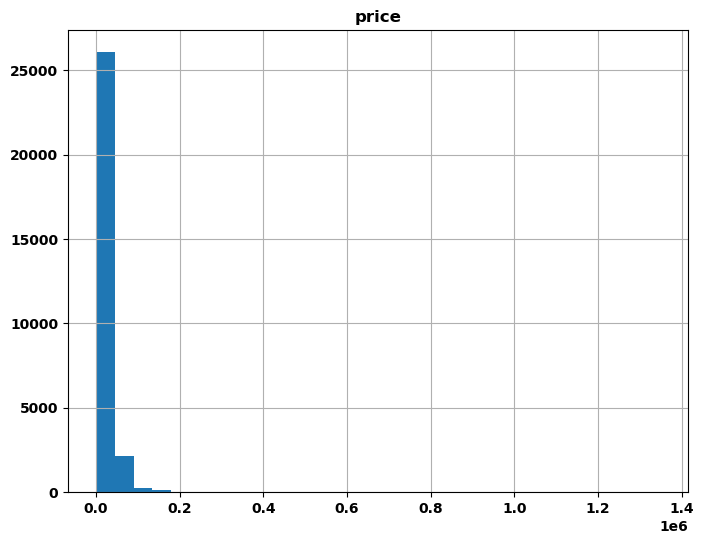

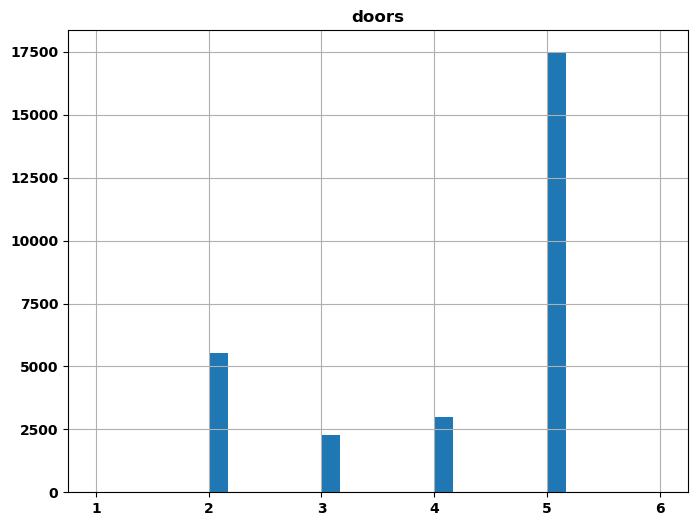

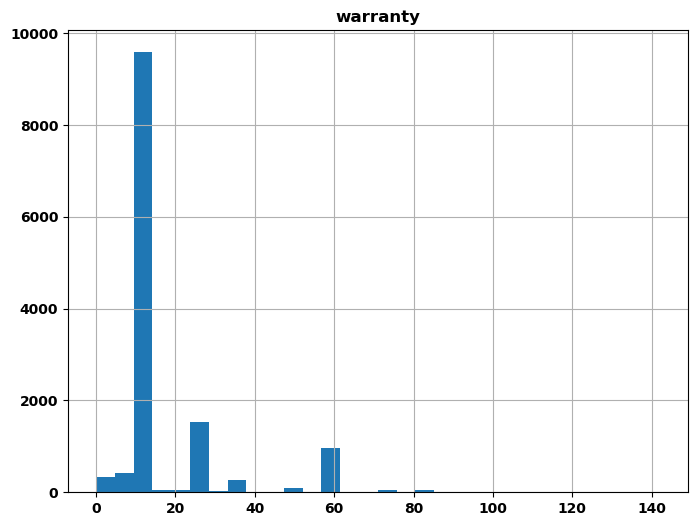

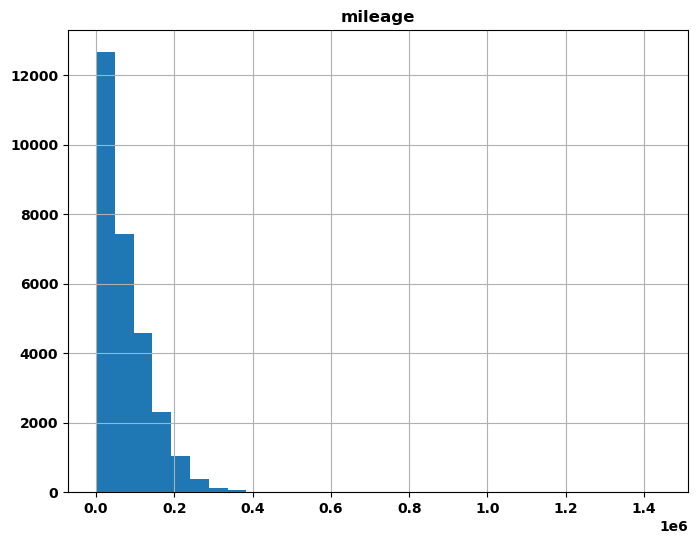

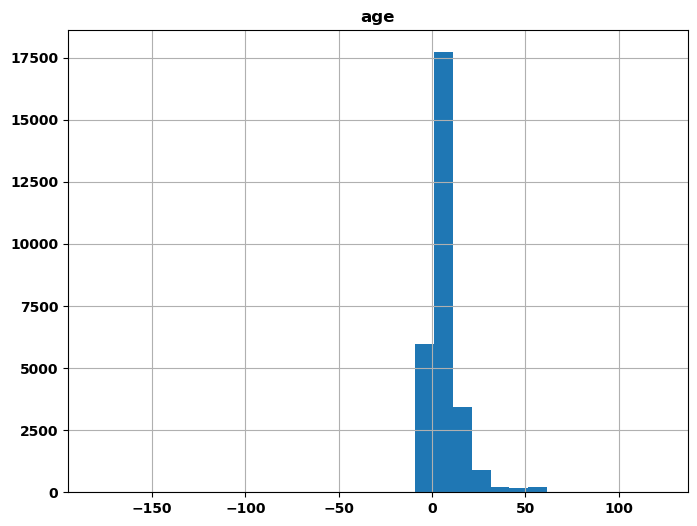

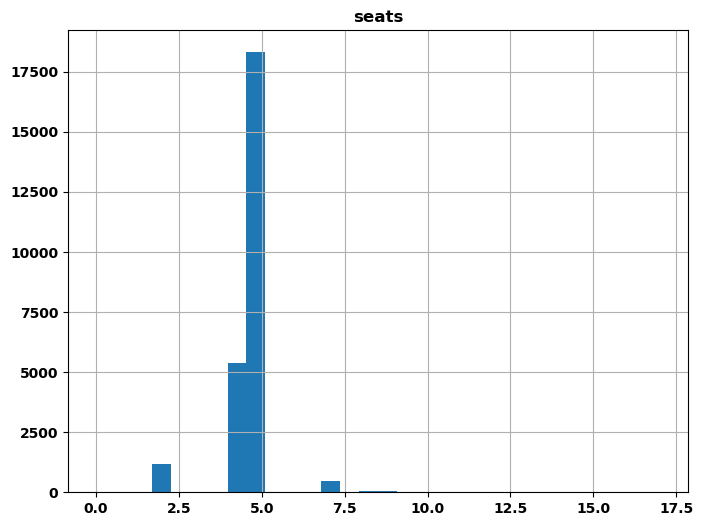

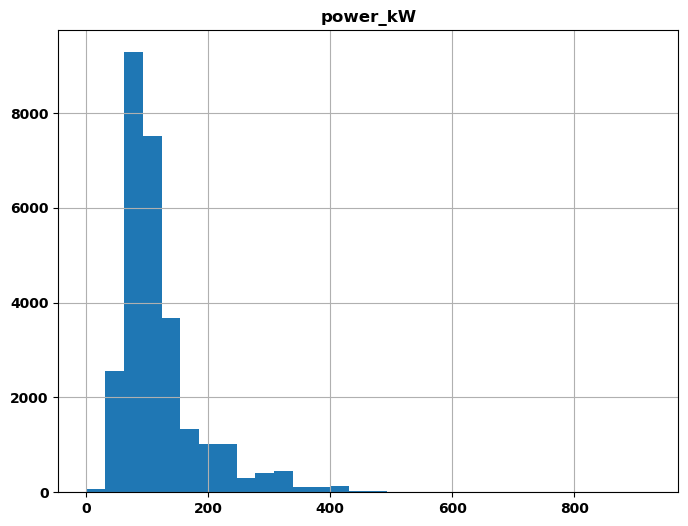

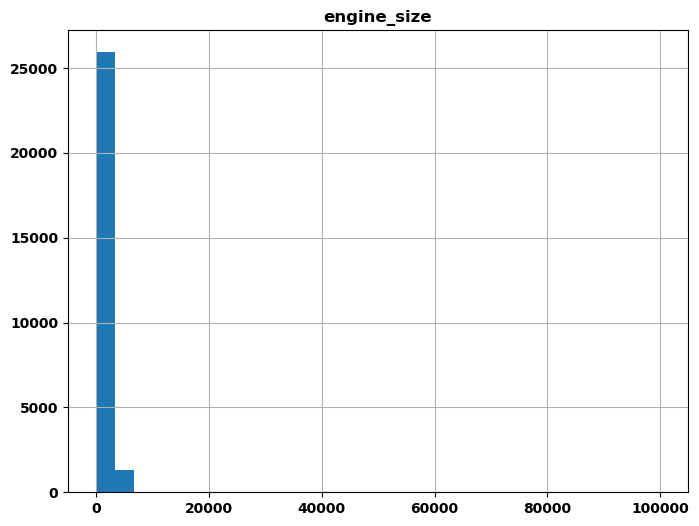

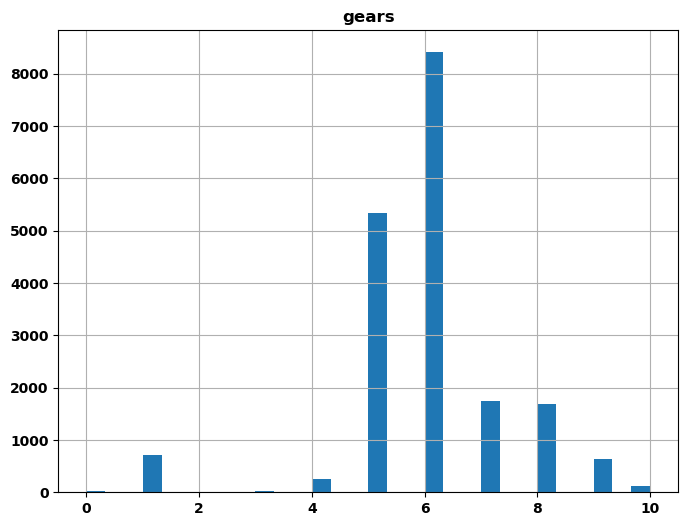

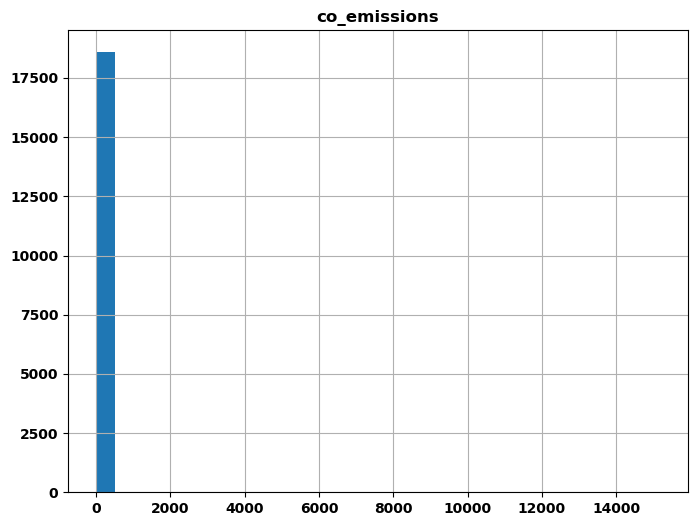

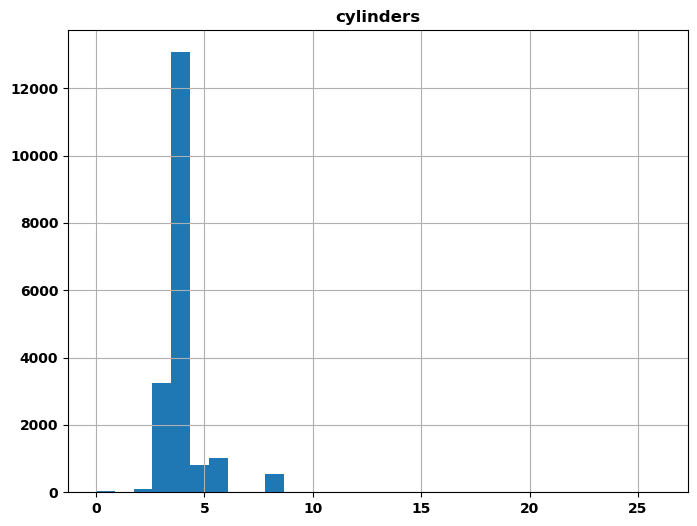

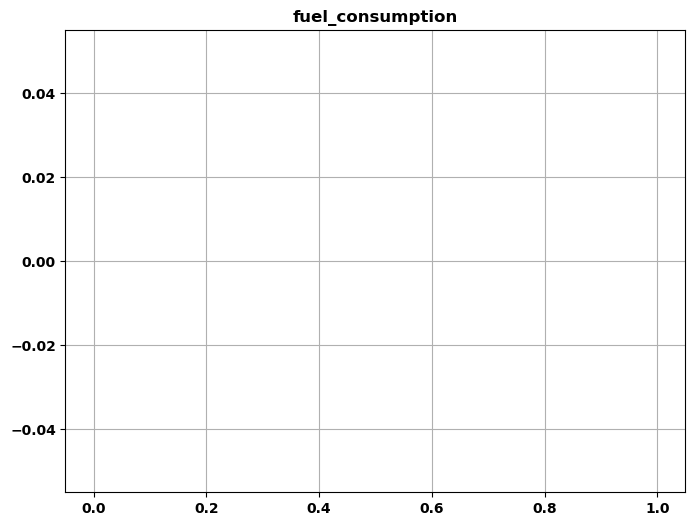

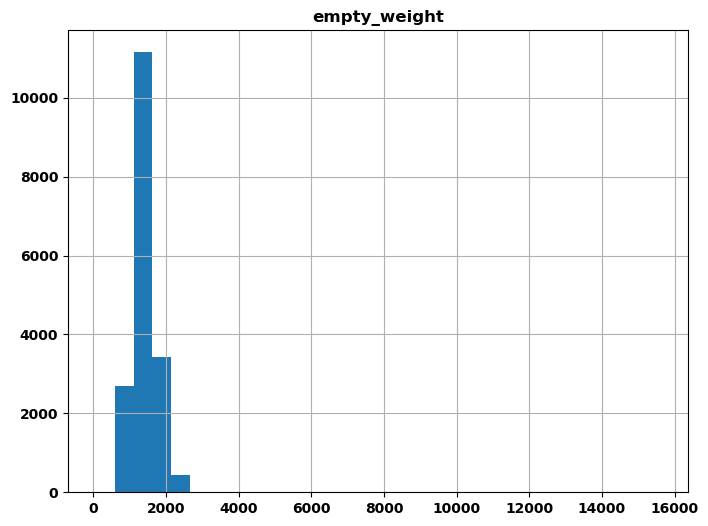

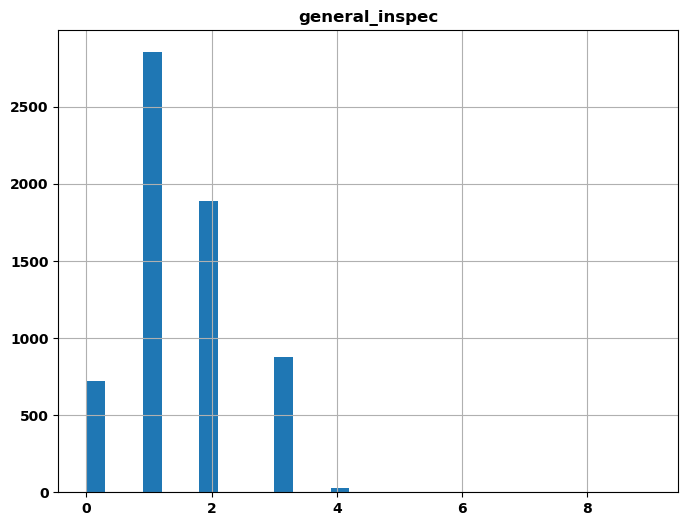

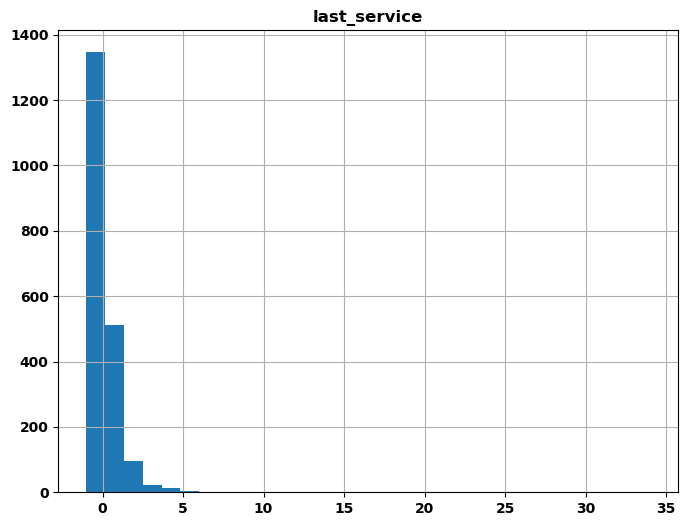

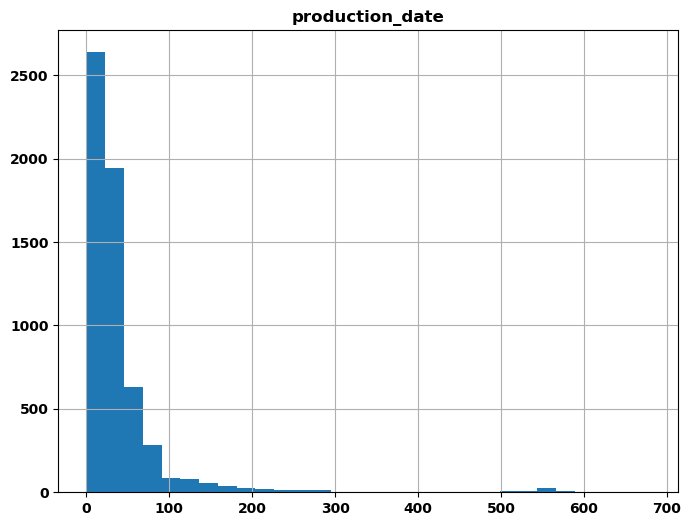

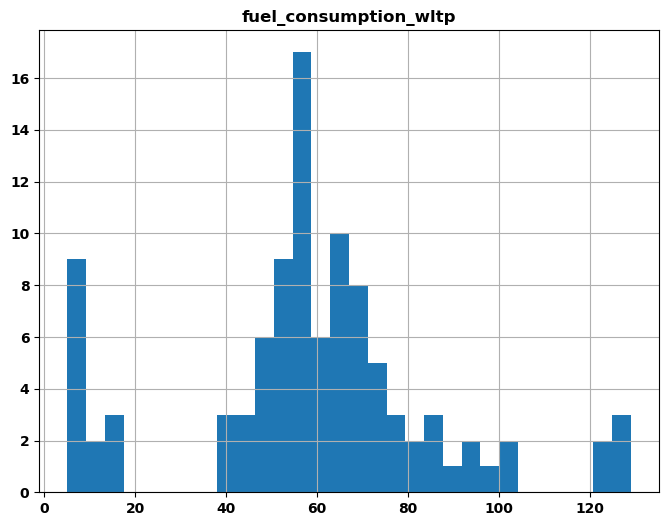

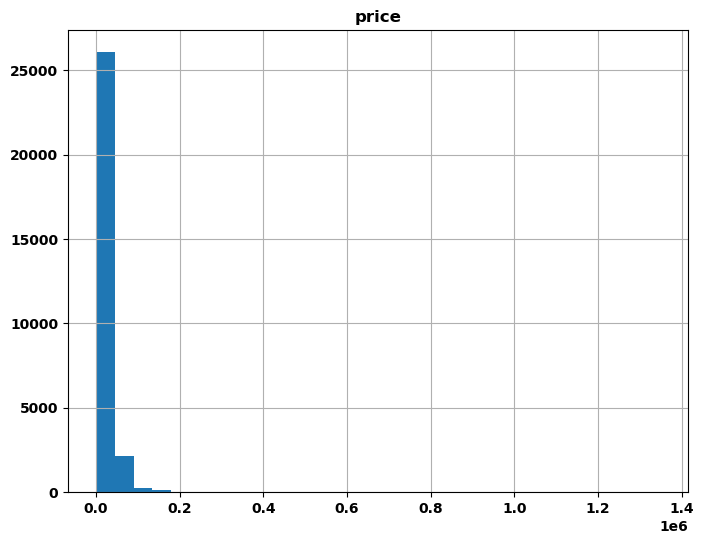

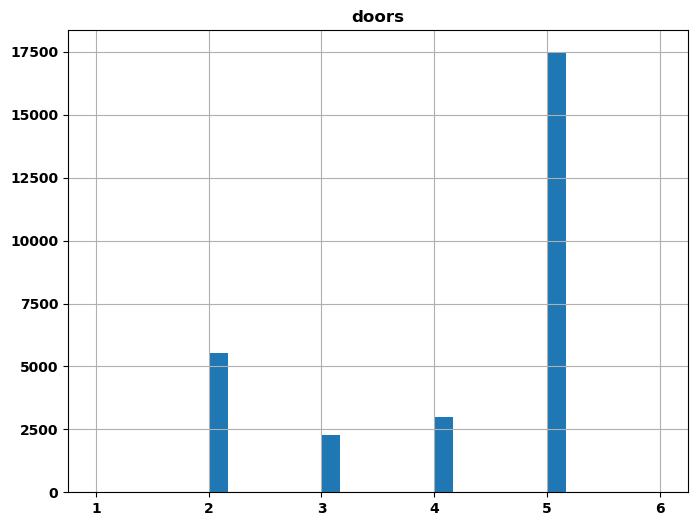

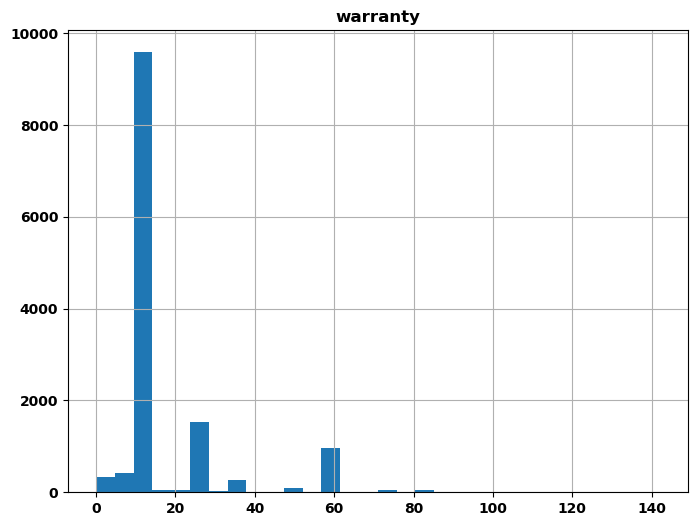

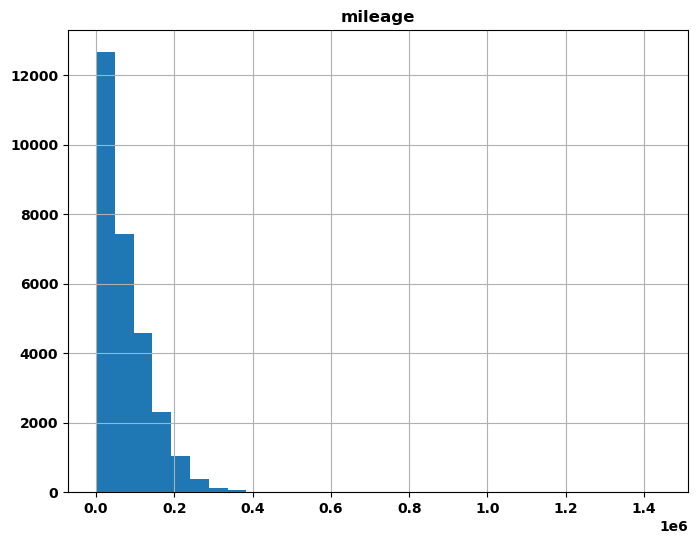

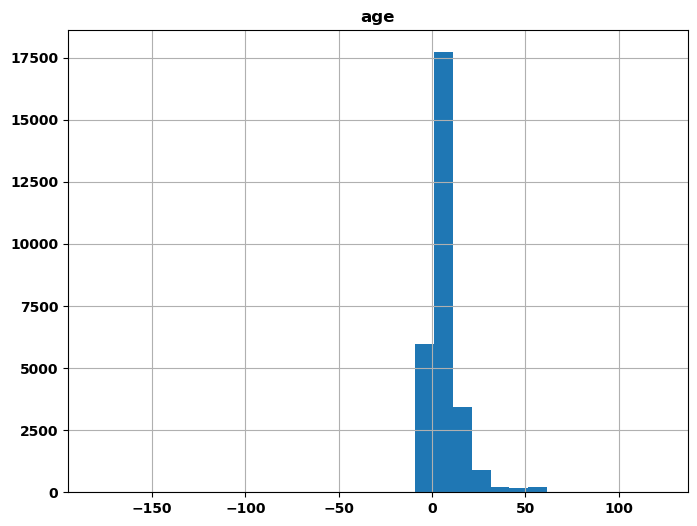

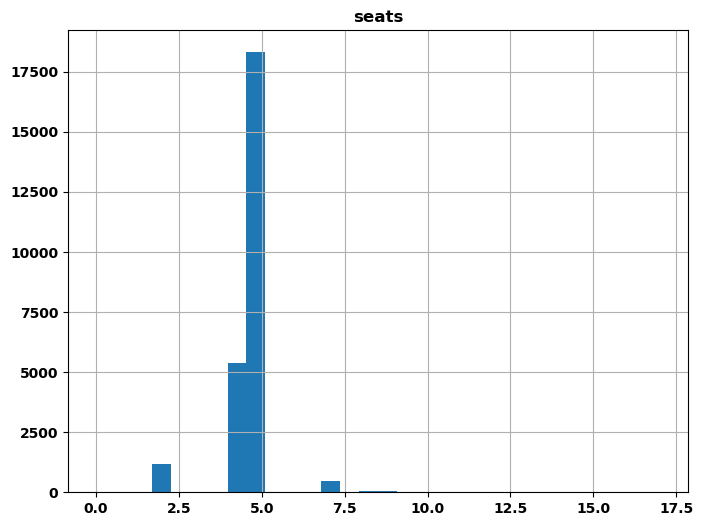

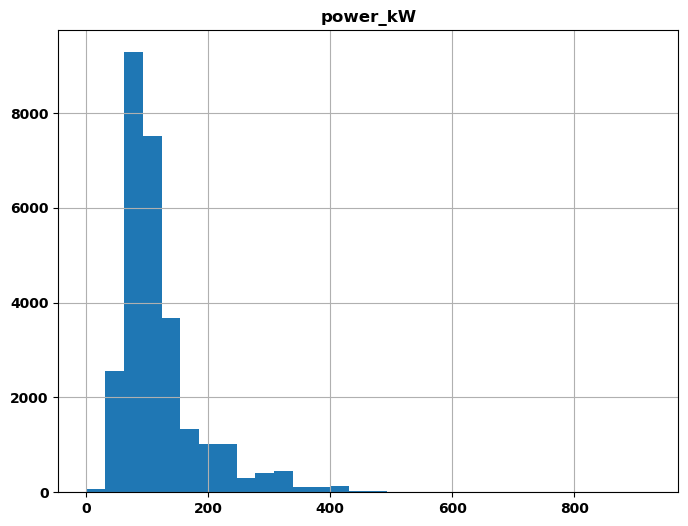

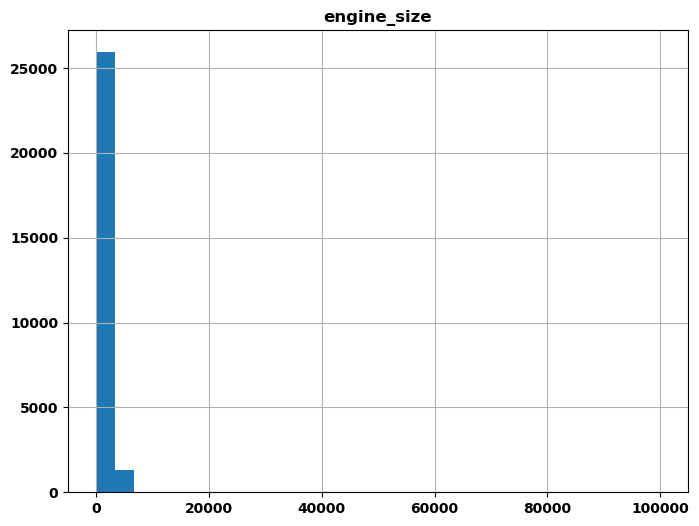

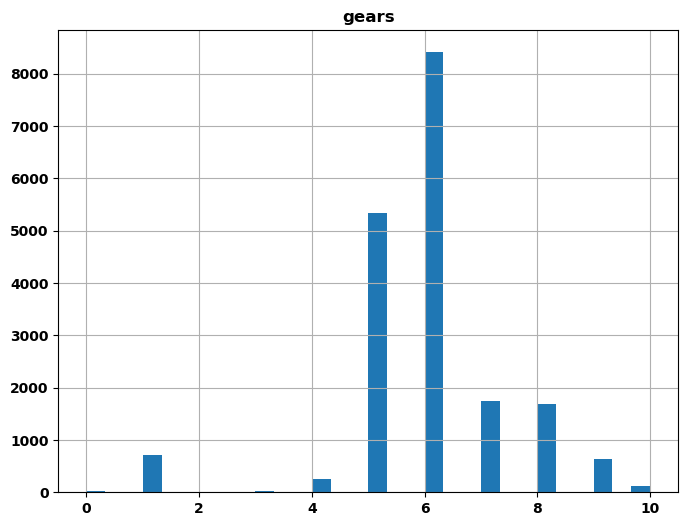

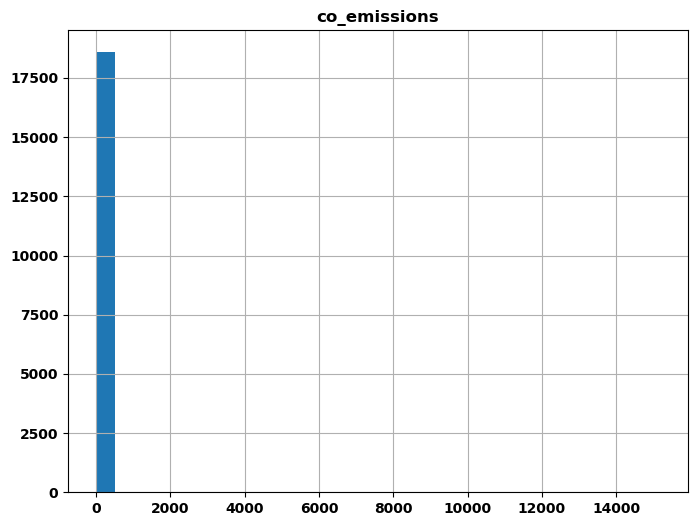

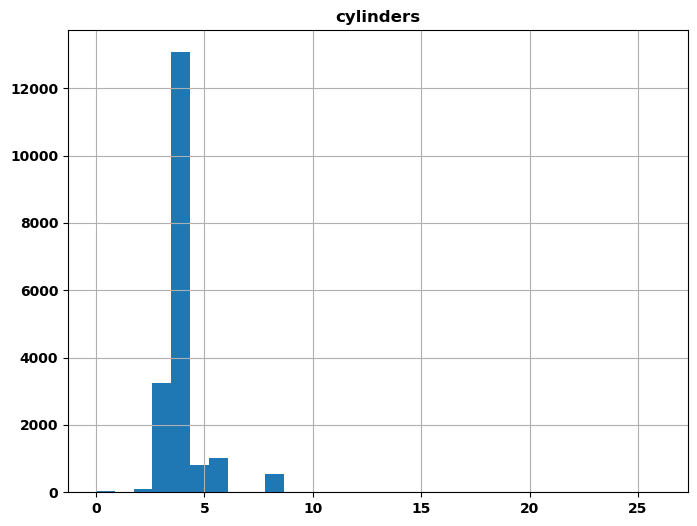

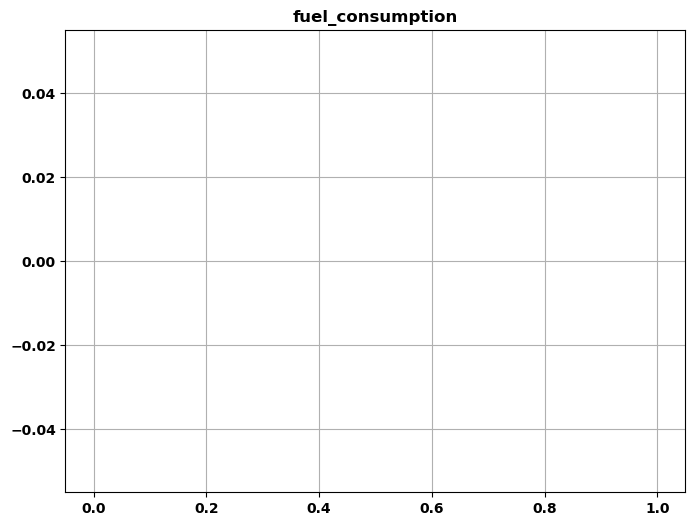

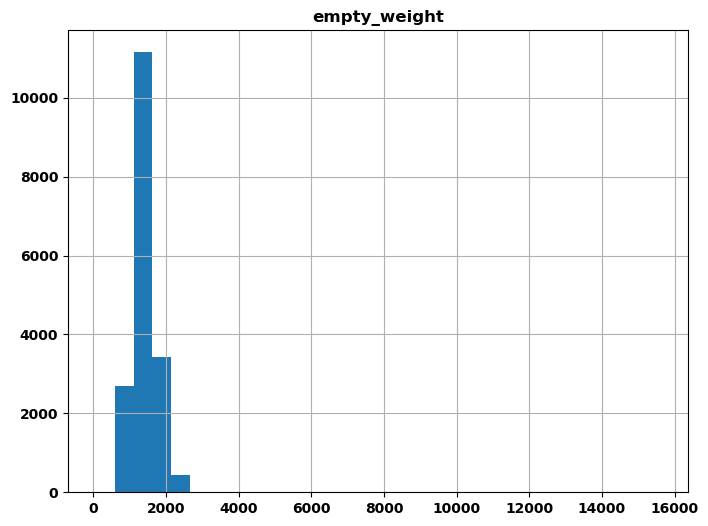

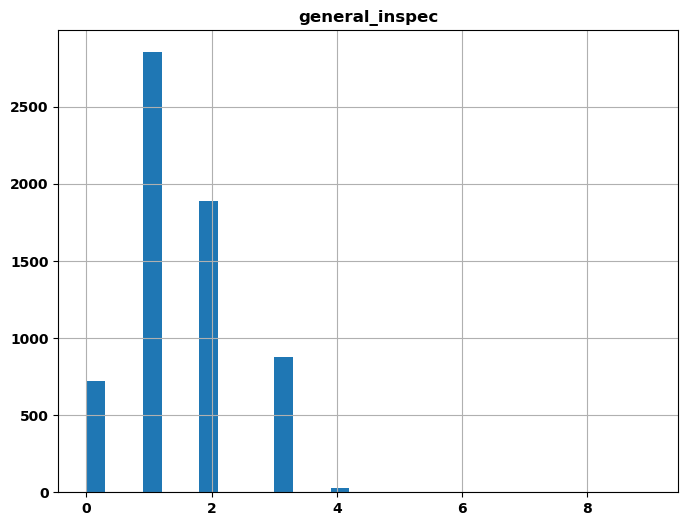

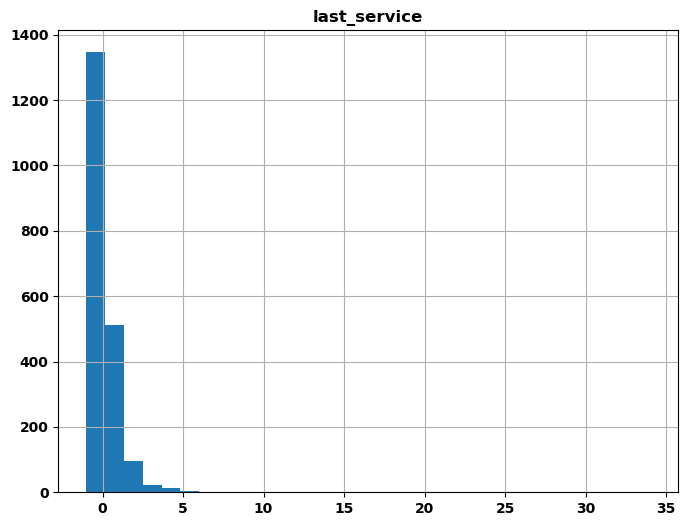

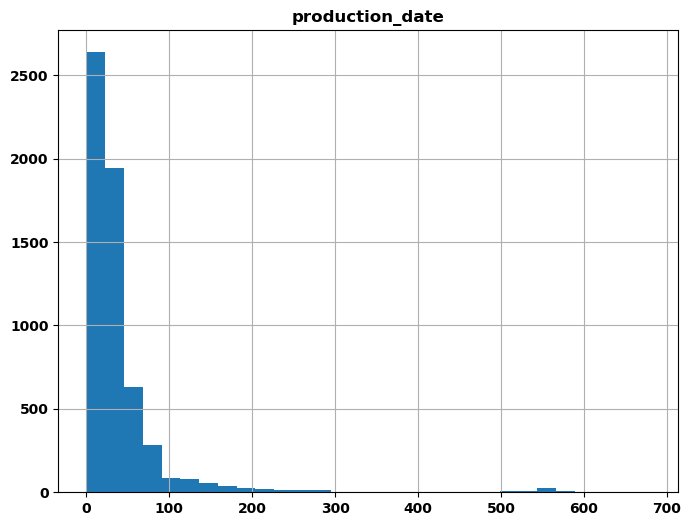

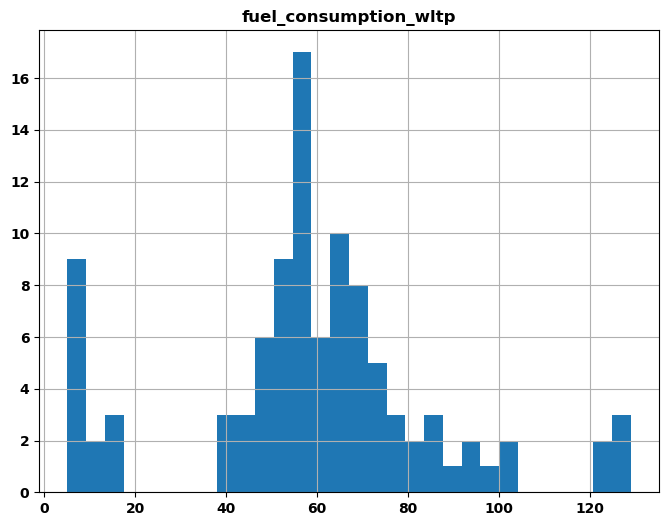

In [10]:
# Step 2: Examining the Distribution

for col in numeric_columns:
    plt.figure()
    df_cleaned1[col].hist(bins=30)
    plt.title(col)
    plt.show()


import matplotlib.pyplot as plt

for col in numeric_columns:
    plt.figure()
    df_cleaned1[col].hist(bins=30)
    plt.title(col)
    plt.show()


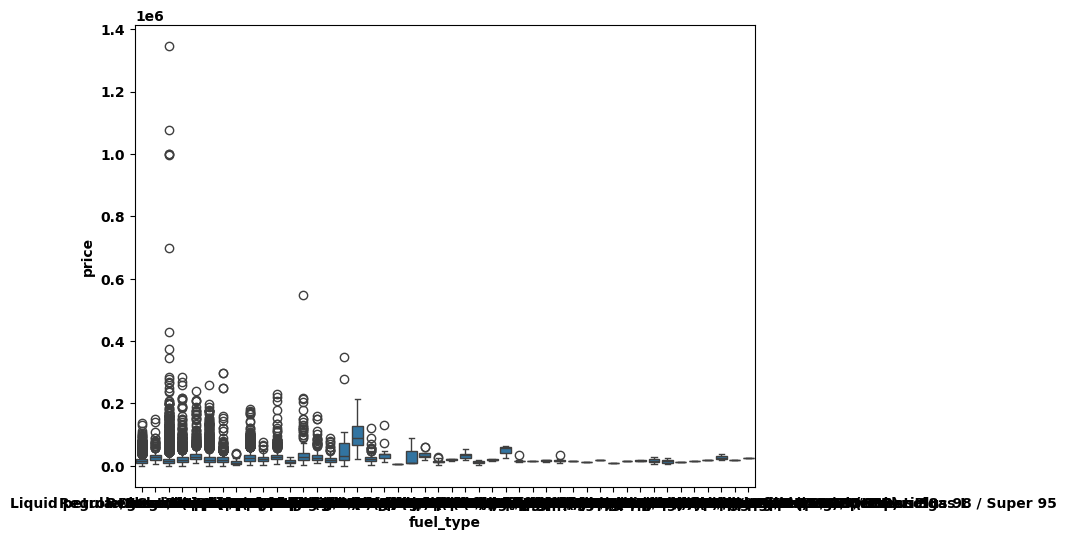

In [11]:
# Grouping Numeric Data with Categorical Variables

sns.boxplot(x='fuel_type', y='price', data=df_cleaned1)
plt.show()



In [12]:
# Step 1: Missing Value Analysis

# Detect missing values

missing_data = df_cleaned1.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print("Missing Values:\n", missing_data)




Missing Values:
 fuel_consumption                             29480
battery_ownership                            29473
power_consumption_wltp                       29464
electric_range_wltp                          29464
fuel_consumption_wltp                        29380
co₂_emissions_wltp                           29364
availability                                 29179
available_from                               29087
taxi_or_rental_car                           29058
power_consumption                            28965
last_timing_belt_change                      28908
last_service                                 27477
other_fuel_types                             27167
production_date                              23572
general_inspec                               23109
energy_efficiency_class                      21676
co₂_efficiency                               21676
model_code                                   21113
emissions_sticker                            20066
desc          

In [13]:
# 1. Make and Model (make, model)

df_cleaned1['make'] = df_cleaned1['make'].fillna('Unknown Make')
df_cleaned1['model'] = df_cleaned1['model'].fillna('Unknown Model')


In [14]:
# 2. Fuel Type (fuel_type)

df_cleaned1['fuel_type'] = df_cleaned1.groupby(['make', 'model'])['fuel_type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))



In [15]:
# 3. Gearbox Type (gearbox)

df_cleaned1['gearbox'] = df_cleaned1.groupby(['make', 'model'])['gearbox'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))


In [16]:
# Numeric Variables

df_cleaned1['mileage'] = df_cleaned1.groupby(['make', 'model'])['mileage'].transform(
    lambda x: x.fillna(x.median()))


In [17]:
# Check for missing values in the 'age' column
missing_count = df_cleaned1['age'].isnull().sum()

if missing_count > 0:
    print(f"The 'age' column has {missing_count} missing values.")
else:
    print("The 'age' column has no missing values.")



The 'age' column has 852 missing values.


In [18]:
average_mileage_per_year = 15000
df_cleaned1['age'] = df_cleaned1['mileage'] // average_mileage_per_year


In [19]:
def analyze_age_column(df_cleaned1, column_name='age', previous_missing_count=None):
    """
    Analyze a column for missing values and unique values. Optionally calculate differences in missing values.

    Parameters:
        df_cleaned1 (pd.DataFrame): The DataFrame to analyze.
        column_name (str): The name of the column to analyze.
        previous_missing_count (int, optional): The number of missing values before the last operation.

    Returns:
        pd.Series: A series containing missing count, missing percentage, unique values,
                   and optional information on missing value differences.
    """
    if column_name not in df_cleaned1.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")

    total_count = len(df_cleaned1)
    missing_count = df_cleaned1[column_name].isnull().sum()
    missing_percentage = (missing_count / total_count) * 100
    unique_values = df_cleaned1[column_name].dropna().unique()

    result = {
        'Missing Count': missing_count,
        'Missing Percentage': f"{missing_percentage:.2f}%",
        'Unique Values': unique_values
    }

    if previous_missing_count is not None:
        result['Missing Removed'] = previous_missing_count - missing_count
        result['Remaining Missing Count'] = missing_count

    return pd.Series(result)

# Eksik değerleri analiz etmek için önce eksik değer sayısını hesapla
previous_missing = df_cleaned1['age'].isnull().sum()

# Eksik değerleri doldurma işlemi
df_cleaned1['age'].fillna(0, inplace=True)

# Doldurma sonrası analiz
result = analyze_age_column(df_cleaned1, 'age', previous_missing_count=previous_missing)
print(result)


Missing Count                                                              0
Missing Percentage                                                     0.00%
Unique Values              [8.0, 0.0, 1.0, 13.0, 11.0, 5.0, 3.0, 6.0, 14....
Missing Removed                                                          850
Remaining Missing Count                                                    0
dtype: object


In [20]:
# Check for missing values in the 'age' column
missing_count = df_cleaned1['age'].isnull().sum()

if missing_count > 0:
    print(f"The 'age' column has {missing_count} missing values.")
else:
    print("The 'age' column has no missing values.")


The 'age' column has no missing values.


In [21]:
# Check for missing values in the 'warranty' column
missing_count = df_cleaned1['warranty'].isnull().sum()

if missing_count > 0:
    print(f"The 'warranty' column has {missing_count} missing values.")
else:
    print("The 'warranty' column has no missing values.")


The 'warranty' column has 16015 missing values.


In [22]:
df_cleaned1['warranty'] = df_cleaned1.groupby(['make', 'age'])['warranty'].transform(
    lambda x: x.fillna(x.median() if not x.median() is None else 24))


In [23]:
def analyze_warranty_column(df_cleaned1, column_name='warranty', previous_missing_count=None):
    """
    Analyze a column for missing values and unique values. Optionally calculate differences in missing values.

    Parameters:
        df_cleaned1 (pd.DataFrame): The DataFrame to analyze.
        column_name (str): The name of the column to analyze.
        previous_missing_count (int, optional): The number of missing values before the last operation.

    Returns:
        pd.Series: A series containing missing count, missing percentwarranty, unique values,
                   and optional information on missing value differences.
    """
    if column_name not in df_cleaned1.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")

    total_count = len(df_cleaned1)
    missing_count = df_cleaned1[column_name].isnull().sum()
    missing_percentwarranty = (missing_count / total_count) * 100
    unique_values = df_cleaned1[column_name].dropna().unique()

    result = {
        'Missing Count': missing_count,
        'Missing Percentwarranty': f"{missing_percentwarranty:.2f}%",
        'Unique Values': unique_values
    }

    if previous_missing_count is not None:
        result['Missing Removed'] = previous_missing_count - missing_count
        result['Remaining Missing Count'] = missing_count

    return pd.Series(result)

# Eksik değerleri analiz etmek için önce eksik değer sayısını hesapla
previous_missing = df_cleaned1['warranty'].isnull().sum()

# Eksik değerleri doldurma işlemi
df_cleaned1['warranty'].fillna(0, inplace=True)

# Doldurma sonrası analiz
result = analyze_warranty_column(df_cleaned1, 'warranty', previous_missing_count=previous_missing)
print(result)

Missing Count                                                              0
Missing Percentwarranty                                                0.00%
Unique Values              [24.0, 12.0, 48.0, 6.0, 3.0, 8.0, 0.0, 36.0, 1...
Missing Removed                                                         1106
Remaining Missing Count                                                    0
dtype: object


In [24]:
# Check for missing values in the 'warranty' column
missing_count = df_cleaned1['warranty'].isnull().sum()

if missing_count > 0:
    print(f"The 'warranty' column has {missing_count} missing values.")
else:
    print("The 'warranty' column has no missing values.")


The 'warranty' column has no missing values.


In [25]:
# Check for missing values in the 'power_kW' column
missing_count = df_cleaned1['power_kW'].isnull().sum()

if missing_count > 0:
    print(f"The 'power_kW' column has {missing_count} missing values.")
else:
    print("The 'power_kW' column has no missing values.")

The 'power_kW' column has 1422 missing values.


In [26]:
df_cleaned1['power_kW'] = df_cleaned1.groupby(['make', 'model'])['power_kW'].transform(
    lambda x: x.fillna(x.median()))


In [27]:
def analyze_power_kW_column(df_cleaned1, column_name='power_kW', previous_missing_count=None):
    """
    Analyze a column for missing values and unique values. Optionally calculate differences in missing values.

    Parameters:
        df_cleaned1 (pd.DataFrame): The DataFrame to analyze.
        column_name (str): The name of the column to analyze.
        previous_missing_count (int, optional): The number of missing values before the last operation.

    Returns:
        pd.Series: A series containing missing count, missing percentpower_kW, unique values,
                   and optional information on missing value differences.
    """
    if column_name not in df_cleaned1.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")

    total_count = len(df_cleaned1)
    missing_count = df_cleaned1[column_name].isnull().sum()
    missing_percentpower_kW = (missing_count / total_count) * 100
    unique_values = df_cleaned1[column_name].dropna().unique()

    result = {
        'Missing Count': missing_count,
        'Missing Percentpower_kW': f"{missing_percentpower_kW:.2f}%",
        'Unique Values': unique_values
    }

    if previous_missing_count is not None:
        result['Missing Removed'] = previous_missing_count - missing_count
        result['Remaining Missing Count'] = missing_count

    return pd.Series(result)

# Eksik değerleri analiz etmek için önce eksik değer sayısını hesapla
previous_missing = df_cleaned1['power_kW'].isnull().sum()

# Eksik değerleri doldurma işlemi
df_cleaned1['power_kW'].fillna(0, inplace=True)

# Doldurma sonrası analiz
result = analyze_power_kW_column(df_cleaned1, 'power_kW', previous_missing_count=previous_missing)
print(result)

Missing Count                                                              0
Missing Percentpower_kW                                                0.00%
Unique Values              [75.0, 215.0, 310.0, 225.0, 100.0, 90.0, 140.0...
Missing Removed                                                          857
Remaining Missing Count                                                    0
dtype: object


In [28]:
# Check for missing values in the 'power_kW' column
missing_count = df_cleaned1['power_kW'].isnull().sum()

if missing_count > 0:
    print(f"The 'power_kW' column has {missing_count} missing values.")
else:
    print("The 'power_kW' column has no missing values.")

The 'power_kW' column has no missing values.


In [29]:
missing_after_fill = df_cleaned1.isnull().sum()
print("Missing Values (After Filling):\n", missing_after_fill[missing_after_fill > 0])


Missing Values (After Filling):
 make_model_ordinal                             850
short_description                             1081
location                                      1074
price                                          850
body_type                                      850
type                                           850
doors                                         1209
country_version                              12591
offer_number                                  6387
mileage                                        850
colour                                        2574
paint                                        14985
desc                                         18670
seller                                         850
seats                                         3975
engine_size                                   2253
gears                                        10526
co_emissions                                 10886
manufacturer_colour                           769

In [30]:
Q1 = df_cleaned1['price'].quantile(0.25)
Q3 = df_cleaned1['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering based on price range
df_cleaned1 = df_cleaned1[(df_cleaned1['price'] >= lower_bound) & (df_cleaned1['price'] <= upper_bound)]


In [31]:
# View summary statistics for numeric columns
numeric_columns = ['mileage', 'power_kW']
print(df_cleaned1[numeric_columns].describe())



            mileage      power_kW
count  2.672000e+04  26720.000000
mean   7.590554e+04    108.855015
std    6.799467e+04     50.694633
min    0.000000e+00      0.000000
25%    2.380000e+04     77.000000
50%    6.137200e+04     96.000000
75%    1.104588e+05    125.000000
max    1.440000e+06    527.000000


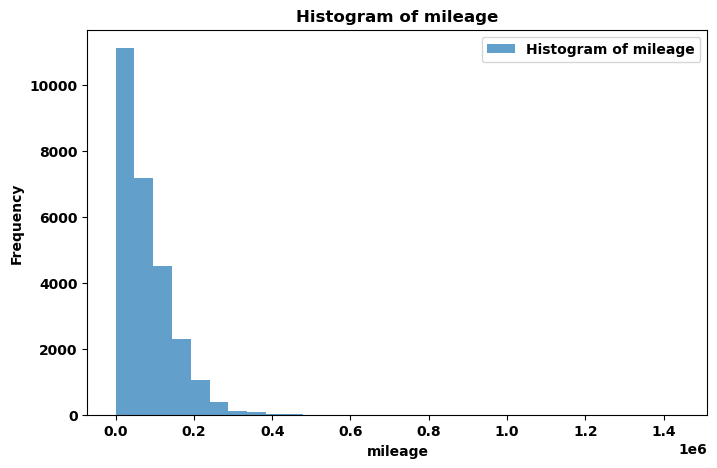

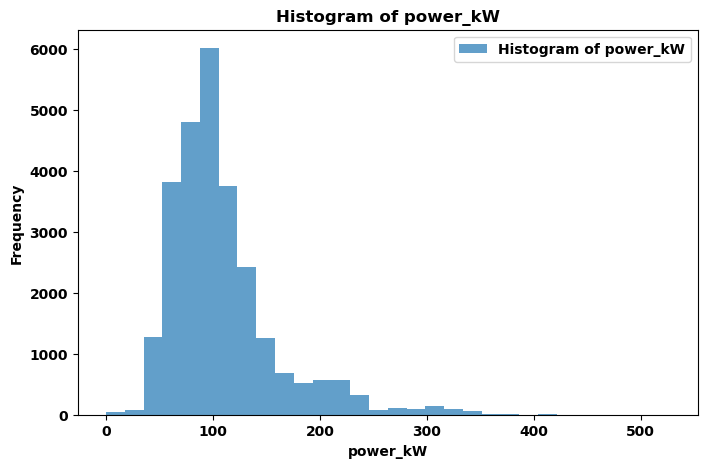

In [32]:
# Visualize the distribution by plotting histograms
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df_cleaned1[col], bins=30, alpha=0.7, label=f"Histogram of {col}")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


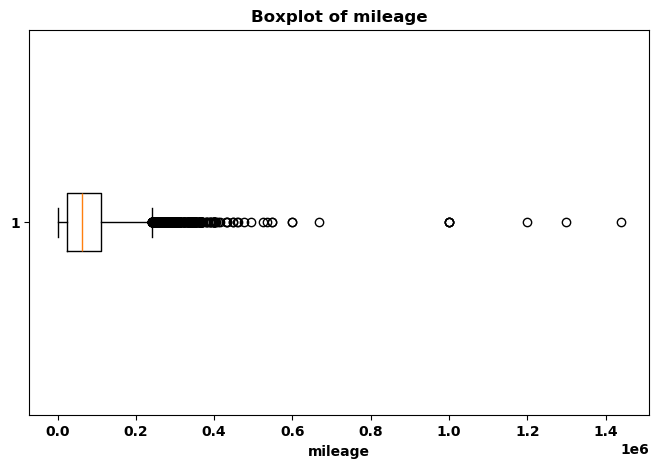

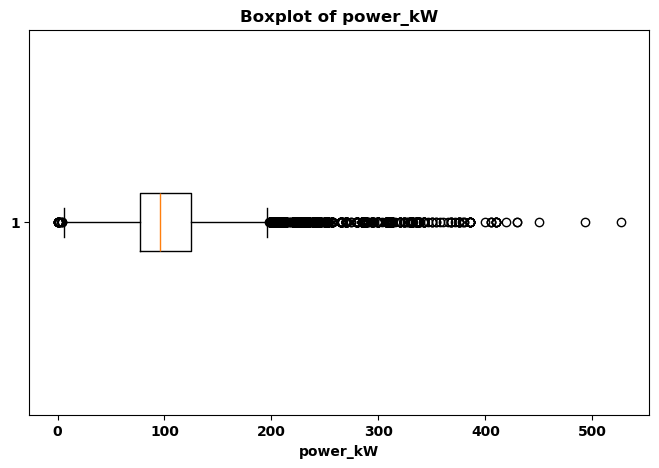

In [33]:
# View Outliers with Boxplot

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df_cleaned1[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


In [34]:
print(df_cleaned1[numeric_columns].head())


    mileage  power_kW
0  120200.0      75.0
3   18995.0     225.0
4  197000.0     100.0
5  165000.0      90.0
6   83339.0      90.0


In [35]:
# Check for Missing Values
print(df_cleaned1[numeric_columns].isnull().sum())


mileage     0
power_kW    0
dtype: int64


In [36]:
# IQR calculation and outlier removal
for col in ['mileage', 'power_kW']:
    Q1 = df_cleaned1[col].quantile(0.25)
    Q3 = df_cleaned1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Set outliers to NaN
    df_cleaned1[col] = df_cleaned1[col].apply(lambda x: x if lower_bound <= x <= upper_bound else None)

# Refill missing values
df_cleaned1['mileage'].fillna(df_cleaned1['mileage'].median(), inplace=True)
df_cleaned1['power_kW'].fillna(df_cleaned1['power_kW'].median(), inplace=True)


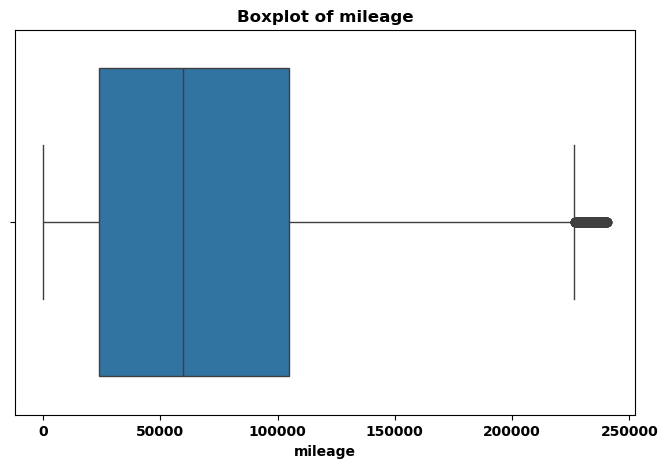

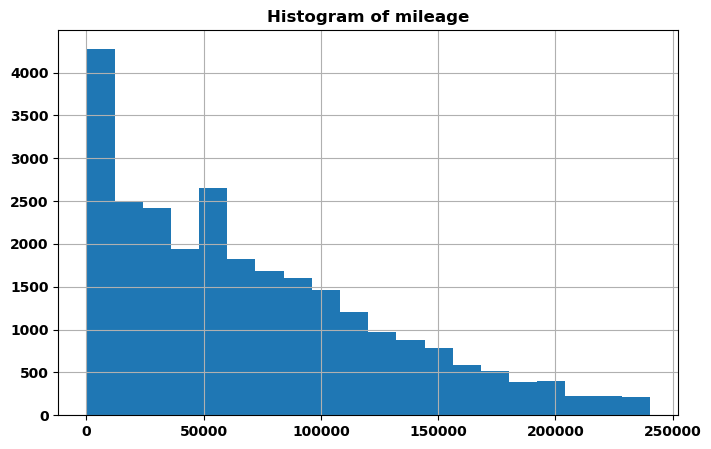

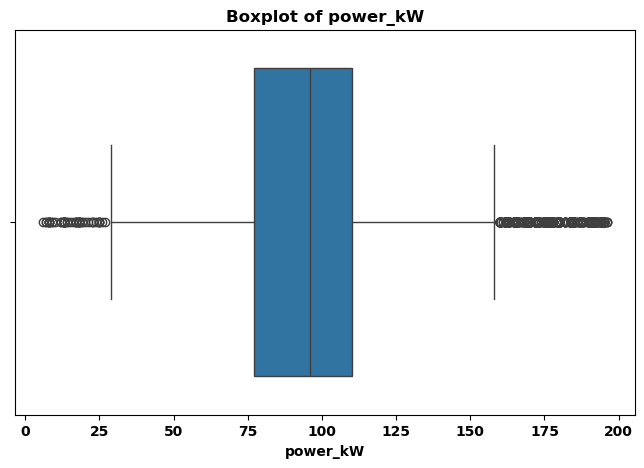

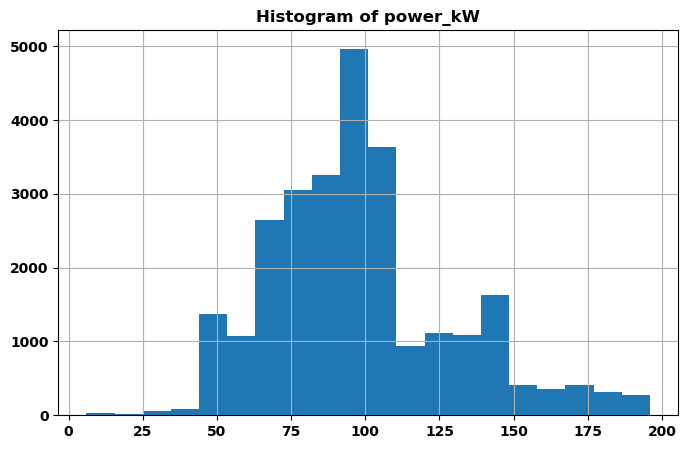

In [37]:
# Visualizing boxplots and histograms
for col in ['mileage', 'power_kW']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_cleaned1[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    
    plt.figure(figsize=(8, 5))
    df_cleaned1[col].hist(bins=20)
    plt.title(f'Histogram of {col}')
    plt.show()


In [38]:
# # Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_cleaned1[['mileage', 'power_kW']] = scaler.fit_transform(df_cleaned1[['mileage', 'power_kW']])


In [39]:
print("Missing Values (Final Status):")
print(df_cleaned1.isnull().sum())

print("Summary Statistics for Numeric Variables:")
print(df_cleaned1.describe())



Missing Values (Final Status):
make_model_ordinal                               0
short_description                              217
make                                             0
model                                            0
location                                       217
price                                            0
body_type                                        0
type                                             0
doors                                          322
country_version                              10894
offer_number                                  5318
warranty                                         0
mileage                                          0
age                                              0
gearbox                                          0
fuel_type                                        0
colour                                        1631
paint                                        13504
desc                                         16750


In [40]:
# Identify categorical columns and those with missing values
categorical_cols = df_cleaned1.select_dtypes(include=['object', 'category']).columns
missing_categorical_cols = df_cleaned1[categorical_cols].isnull().sum()[lambda x: x > 0].index


for col in missing_categorical_cols:
    df_cleaned1[col] = df_cleaned1.groupby(['make', 'model'])[col].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_cleaned1[col].mode()[0])
    )

print(df_cleaned1[missing_categorical_cols].isnull().sum())



short_description                            0
location                                     0
country_version                              0
offer_number                                 0
colour                                       0
paint                                        0
desc                                         0
manufacturer_colour                          0
drivetrain                                   0
comfort__convenience_package_test            0
entertainment__media_package_labeled_test    0
safety_security_package_labeled_test         0
extras                                       0
model_code                                   0
full_service_history                         0
non_smoker_vehicle                           0
emission_class                               0
emissions_sticker                            0
upholstery_colour                            0
upholstery                                   0
previous_owner                               0
other_fuel_ty

In [41]:
categorical_cols = df_cleaned1.select_dtypes(include=['object', 'category']).columns
print("Categorical Variables:\n", categorical_cols)

Categorical Variables:
 Index(['make_model_ordinal', 'short_description', 'make', 'model', 'location',
       'body_type', 'type', 'country_version', 'offer_number', 'gearbox',
       'fuel_type', 'colour', 'paint', 'desc', 'seller', 'manufacturer_colour',
       'drivetrain', 'comfort__convenience_package_test',
       'entertainment__media_package_labeled_test',
       'safety_security_package_labeled_test', 'extras', 'model_code',
       'full_service_history', 'non_smoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'previous_owner', 'other_fuel_types', 'power_consumption',
       'energy_efficiency_class', 'co₂_efficiency', 'co₂_emissions_wltp',
       'available_from', 'taxi_or_rental_car', 'availability',
       'last_timing_belt_change', 'electric_range_wltp',
       'power_consumption_wltp', 'battery_ownership'],
      dtype='object')


In [42]:
print("Missing Values (Final Status):")
print(df_cleaned1.isnull().sum())

print("Summary Statistics for Numeric Variables:")
print(df_cleaned1.describe())


Missing Values (Final Status):
make_model_ordinal                               0
short_description                                0
make                                             0
model                                            0
location                                         0
price                                            0
body_type                                        0
type                                             0
doors                                          322
country_version                                  0
offer_number                                     0
warranty                                         0
mileage                                          0
age                                              0
gearbox                                          0
fuel_type                                        0
colour                                           0
paint                                            0
desc                                             0


In [43]:
from sklearn.preprocessing import LabelEncoder

# Example: Label encoding for the 'gearbox' variable
le = LabelEncoder()
df_cleaned1['gearbox_encoded'] = le.fit_transform(df_cleaned1['gearbox'])

# Can also be applied to other suitable variables
df_cleaned1['emission_class_encoded'] = le.fit_transform(df_cleaned1['emission_class'])
df_cleaned1['body_type_encoded'] = le.fit_transform(df_cleaned1['body_type'])


In [44]:

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Assuming the dataframe is named df_cleaned1

# Label Encoding for gearbox, emission_class, body_type
le = LabelEncoder()
df_cleaned1['gearbox_encoded'] = le.fit_transform(df_cleaned1['gearbox'])
df_cleaned1['emission_class_encoded'] = le.fit_transform(df_cleaned1['emission_class'])
df_cleaned1['body_type_encoded'] = le.fit_transform(df_cleaned1['body_type'])

# Drop the original columns if they are no longer needed
df_cleaned1.drop(['gearbox', 'emission_class', 'body_type'], axis=1, inplace=True)

# Fill remaining missing values excluding 'fuel_consumption'
def fill_missing_values(df):
    for col in df.columns:
        if col != 'fuel_consumption' and df[col].isnull().sum() > 0:
            if df[col].dtype == 'object':
                # Fill with mode for categorical
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:
                # Fill with mean for numerical
                df[col].fillna(df[col].mean(), inplace=True)
    return df

df_cleaned1 = fill_missing_values(df_cleaned1)

# Handle 'fuel_consumption' column by dropping
if 'fuel_consumption' in df_cleaned1.columns:
    df_cleaned1.drop('fuel_consumption', axis=1, inplace=True)

# Verify no missing values remain
missing_values = df_cleaned1.isnull().sum()
print(missing_values[missing_values > 0])



Series([], dtype: int64)


In [45]:
# Verify no missing values remain
missing_values = df_cleaned1.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [46]:
# Update the current categorical columns
categorical_cols = ['body_type_encoded', 'gearbox_encoded', 'emission_class_encoded']

# Analyze these columns with describe
print(df_cleaned1[categorical_cols].describe())



       body_type_encoded  gearbox_encoded  emission_class_encoded
count       26720.000000     26720.000000            26720.000000
mean            2.609880         0.640494                5.105464
std             1.787751         0.484444                1.707457
min             0.000000         0.000000                0.000000
25%             1.000000         0.000000                4.000000
50%             3.000000         1.000000                5.000000
75%             4.000000         1.000000                5.000000
max             5.000000         2.000000                8.000000


In [47]:
print(df_cleaned1.head())
print(df_cleaned1[categorical_cols].describe())


       make_model_ordinal                           short_description  \
0     Mercedes-Benz A 160                                         CDi   
3  Mercedes-Benz A 35 AMG                              4Matic+ 7G-DCT   
4  Mercedes-Benz A 45 AMG                    200CDI BE Line 4M 7G-DCT   
5     Mercedes-Benz C 160  Sp Ed C-Klasse Sportcoupe!TÜV N!24 Mon Gew   
6   Mercedes-Benz CLA 180                                        180D   

            make     model                                           location  \
0  Mercedes-Benz     A 160  PI EL PALMAR C/FORJA 6  11500 PUERTO DE SANTA ...   
3  Mercedes-Benz  A 35 AMG     Carrer de Provença 31 Local  8029 BARCELONA ES   
4  Mercedes-Benz  A 45 AMG               CARRIL ARAGONES 4  30007 CASILLAS ES   
5  Mercedes-Benz     C 160                 Beethovenstr 89  42655 Solingen DE   
6  Mercedes-Benz   CLA 180        CR PATERNA-LA CAÑADA KM 2  46980 PATERNA ES   

     price  type  doors country_version offer_number  ...  available_from 

In [48]:
print("Missing Values (Final Status):")
print(df_cleaned1.isnull().sum())

print("Summary Statistics for Numeric Variables:")
print(df_cleaned1.describe())

Missing Values (Final Status):
make_model_ordinal                           0
short_description                            0
make                                         0
model                                        0
location                                     0
price                                        0
type                                         0
doors                                        0
country_version                              0
offer_number                                 0
warranty                                     0
mileage                                      0
age                                          0
fuel_type                                    0
colour                                       0
paint                                        0
desc                                         0
seller                                       0
seats                                        0
power_kW                                     0
engine_size                  

In [49]:
print("Missing Values (Final Check):")
print(df_cleaned1.isnull().sum())

Missing Values (Final Check):
make_model_ordinal                           0
short_description                            0
make                                         0
model                                        0
location                                     0
price                                        0
type                                         0
doors                                        0
country_version                              0
offer_number                                 0
warranty                                     0
mileage                                      0
age                                          0
fuel_type                                    0
colour                                       0
paint                                        0
desc                                         0
seller                                       0
seats                                        0
power_kW                                     0
engine_size                   

In [50]:
df_cleaned1.columns

Index(['make_model_ordinal', 'short_description', 'make', 'model', 'location',
       'price', 'type', 'doors', 'country_version', 'offer_number', 'warranty',
       'mileage', 'age', 'fuel_type', 'colour', 'paint', 'desc', 'seller',
       'seats', 'power_kW', 'engine_size', 'gears', 'co_emissions',
       'manufacturer_colour', 'drivetrain', 'cylinders',
       'comfort__convenience_package_test',
       'entertainment__media_package_labeled_test',
       'safety_security_package_labeled_test', 'extras', 'empty_weight',
       'model_code', 'general_inspec', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'emissions_sticker', 'upholstery_colour',
       'upholstery', 'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co₂_efficiency',
       'fuel_consumption_wltp', 'co₂_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_wltp

In [51]:
# Column names and data types
print(df_cleaned1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26720 entries, 0 to 29478
Data columns (total 57 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   make_model_ordinal                         26720 non-null  object 
 1   short_description                          26720 non-null  object 
 2   make                                       26720 non-null  object 
 3   model                                      26720 non-null  object 
 4   location                                   26720 non-null  object 
 5   price                                      26720 non-null  float64
 6   type                                       26720 non-null  object 
 7   doors                                      26720 non-null  float64
 8   country_version                            26720 non-null  object 
 9   offer_number                               26720 non-null  object 
 10  warranty                   

In [52]:
columns_to_drop = [
    'fuel_consumption_wltp', 'last_service', 
    'general_inspec', 'production_date'
]
df_cleaned1.drop(columns=columns_to_drop, inplace=True)

In [53]:
print("Missing Values (Final Status):")
print(df_cleaned1.isnull().sum())

Missing Values (Final Status):
make_model_ordinal                           0
short_description                            0
make                                         0
model                                        0
location                                     0
price                                        0
type                                         0
doors                                        0
country_version                              0
offer_number                                 0
warranty                                     0
mileage                                      0
age                                          0
fuel_type                                    0
colour                                       0
paint                                        0
desc                                         0
seller                                       0
seats                                        0
power_kW                                     0
engine_size                  

In [54]:
df_cleaned1.T

,0,3,4,5,6,7,8,9,10,11,...,29468,29469,29470,29471,29472,29474,29475,29476,29477,29478
make_model_ordinal,Mercedes-Benz A 160,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG,Mercedes-Benz C 160,Mercedes-Benz CLA 180,Mercedes-Benz A 220,Mercedes-Benz A 35 AMG,Mercedes-Benz A 200,Mercedes-Benz A 160,Mercedes-Benz A 45 AMG,...,Volvo S90,Volvo S90,Volvo S90,Volvo V40,Volvo S60,Volvo S90,Volvo S40,Volvo C30,Volvo S90,Volvo S80
short_description,CDi,4Matic+ 7G-DCT,200CDI BE Line 4M 7G-DCT,Sp Ed C-Klasse Sportcoupe!TÜV N!24 Mon Gew,180D,7G-DCT,4MATIC,200CDI Autotronic,CDI 90PK NK77971,4Matic 7G-DCT,...,T6 AWD Geartronic R Design Vol!!,D4 R-Design Aut 190 18,D4 R-Design Aut 190 18,20 D2 Kinetic,25 T Momentum,T8 Twin Business Plus AWD Aut,24i Momentum/ Airco/ NAP/ APK/ Elek Ramen,16 D DRIVe Start/Stop R-design,T5 AUT(8) MOMENTUM BUSINESS SCHUIFDAK 360GR CA...,29 Executive G NETTE AUTO! LEER! NAVI! CRUISE! L
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,...,Volvo,Volvo,Volvo,Volvo,Volvo,Volvo,Volvo,Volvo,Volvo,Volvo
model,A 160,A 35 AMG,A 45 AMG,C 160,CLA 180,A 220,A 35 AMG,A 200,A 160,A 45 AMG,...,S90,S90,S90,V40,S60,S90,S40,C30,S90,S80
location,PI EL PALMAR C/FORJA 6 11500 PUERTO DE SANTA ...,Carrer de Provença 31 Local 8029 BARCELONA ES,CARRIL ARAGONES 4 30007 CASILLAS ES,Beethovenstr 89 42655 Solingen DE,CR PATERNA-LA CAÑADA KM 2 46980 PATERNA ES,CTRA DE MADRID KM 3157 50012 ZARAGOZA ES,Voogdijstraat 25 3500 Hasselt BE,AUTOVÍA AS-2 Nº 1529 33392 GIJON ES,Bestel gemakkelijk Online 24/7 1000 Brussel BE,POLIGONO OTERO 8 NAVE 5 39608 IGOLLO DE CAMAR...,...,2521AA DEN HAAG NL,Avenidan de la Constitución 227 28850 TORREJO...,Ossebroeken 20 9411 VR BEILEN NL,1000 Brussel BE,CALLE CATALUNYA 37 8520 LLERONA ES,HERMANOS LUMIERE Nº16 29004 MALAGA ES,Stobbeweg 6 2461 EX TER AAR NL,Sur rendez-vous 5060 Sambreville BE,Bergambachterstraat 5 2871 JB SCHOONHOVEN NL,Lage Ham 106 5102 AE DONGEN NL
price,16950.0,46990.0,16800.0,4690.0,22550.0,26900.0,44999.0,23900.0,14200.0,37999.0,...,38000.0,27190.0,27190.0,13000.0,4999.0,37600.0,5499.0,7300.0,29900.0,4440.0
type,Used,Used,Used,Used,Used,Used,Used,Used,Used,Used,...,Used,Used,Used,Used,Used,Used,Used,Used,Used,Used
doors,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,...,4.0,4.0,4.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0
country_version,Spain,Spain,Spain,Germany,Spain,Spain,Spain,Spain,Spain,Spain,...,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Belgium,Spain,Spain
offer_number,7468157,7464503,7127931,8574,7201260,7329555,j107114,7454322,NK77971,7209100,...,GW-AZ630,7283863,7284145,KT32585,7408379,7449968,09-PF-XS,00GGN1,2791,43-JR-LR


In [55]:
df_cleaned1.to_csv("handling_with_missing_values_data.csv", index=False)